In [8]:
# My Code : 인접 list를 사용해서 해결
N, M, K = map(int, input().split())
way = [list(map(int, input().split())) for _ in range(M)]
visit = []
strt = K

injlst = [[] for _ in range(N+1)]

for i in way:
	a = i[0]
	b = i[1]
	injlst[a].append(b)
	a = i[1]
	b = i[0]
	injlst[a].append(b)

def goto (strt, visit, injlst):
	strt = int(strt)
	if strt not in visit:
		visit.append(strt)

	if len(injlst[strt]) > 0:
		nextstrt = min(injlst[strt])
		if nextstrt in visit:
			injlst[strt].remove(nextstrt)
			return strt, visit, injlst
		injlst[strt] = []
		return nextstrt, visit, injlst
	else:
		return 'brk' , visit, injlst

while strt != 'brk':
	strt, visit, injlst = goto(strt, visit, injlst)

a = len(visit)
b = visit[-1]

print(a, b)

6 5 1
1 2
2 3
3 4
4 5
5 6
6 6


## **Knewly Gained Acknowledge**

```python
for i in way:
	a = i[0]
	b = i[1]
	injlst[a].append(b)
	a = i[1]
	b = i[0]
	injlst[a].append(b)
```
- 문제에서의 그래프는 양방향 그래프이기 떄문에 순서와 상관없이 a라는 노드에서 출발해서 b 노드에 도착하는 간선이 있다면 반대 방향의 간선도 고려해주어야 한다.

```python
injlst = [[] for _ in range(N+1)]
```
- 각각의 노드에 도착할 때마다 지날 수 있는 노드를 계산하지 말고, 한 번의 반복문 수행으로 미리 계산해둔다.

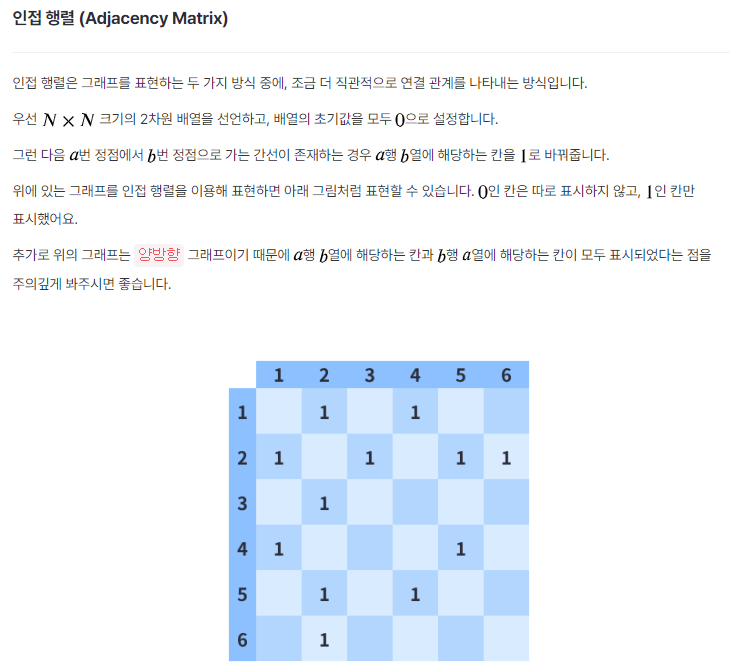
- 인접 행렬의 경우, a 노드에서 b 노드로 가는 간선이 존재하는 지 확인하려면 단순히 a행 b열의 값이 0인지 1인지만 살펴보면 되기 떄문에, O(1), 즉 상수 시간안에 해결할 수 있지만,
- 주어지는 노드 개수의 제곱에 비례하는 크기의 배열을 생성해야하므로 공간복잡도가 너무 커진다.
- 또한, 어떤 정점에 연결된 다른 정점들의 정보를 모두 알고자 하려면 다른 N개의 정점에 대하여 모두 살펴봐야한다.
- 연결된 일부 정점만을 찾기 위해 매번 N개의 노드를 탐색하는 것은 비효율적이다.


### **Adjacency List 인접 리스트**
- 어떤 정점에서 간선을 통해 이동할 수 있는 정점들만 관리하는 표현 방식
- 정점마다 이동할 수 있는 서로 다른 정점의 개수가 다르므로 list를 이용하여 구현


```python
'''
input
6 6
1 2
1 4
2 3
2 5
2 6
4 5
'''

N, M = map(int, input().split())

# a, b의 범위가 1 ~ N 이므로 선언할 때 애초에 N + 1개를 선언해줍니다.
# 이러면 a - 1, b - 1 처럼 번거롭지 않죠.
graph = [[] for _ in range(N + 1)]
for _ in range(M):
	a, b = map(int, input().split())
	graph[a].append(b)
	graph[b].append(a)

# 0번 정점은 임의로 넣은 것이므로 더미데이터입니다! 0번 빼고 출력합니다.
print(graph[1:]) # [[2, 4], [1, 3, 5, 6], [2], [1, 5], [2, 4], [2]]
```
- 인접 리스트는 각 정점마다 실제로 연결되어 있는 정점의 정보만을 저장하기에 공간 복잡도 측면에서 효율적
- N개의 정점을 모두 확인해보지 않아도 괜찮다.
- 어떤 두 정점을 연결하는 간선이 존재하는 지를 알아보려면, 인접행렬이 더 빠르기는 하나, 대부분의 문제에서는 인접 리스트가 더 빠르다.


In [ ]:
a = [[1,2], [1,1]]
b = sorted(a)
b

[[1, 1], [1, 2]]

In [ ]:
m = min(b)
m

['1', '1']

In [ ]:
# BFS
from collections import deque

def bfs(start):
	q = deque([start])

	while q:
		now = q.popleft()
		visited[now] = 1

		for to in sorted(graph[now]):
			if not visited[to]:
				q.append(to)
				break
		else:
			return now

N, M, K = map(int, input().split())
graph = [[] for _ in range(N + 1)]
visited = [0] * (N + 1)

for _ in range(M):
	s, e = map(int, input().split())
	graph[s].append(e)
	graph[e].append(s)

result = bfs(K)
print(sum(visited), result)

In [ ]:
# DFS
import sys
sys.setrecursionlimit(10**4)

def dfs(now):
	for to in sorted(graph[now]):
		if not visited[to]:
			visited[to] = 1
			return dfs(to)
	else:
		return now

N, M, K = map(int, input().split())
graph = [[] for _ in range(N + 1)]
visited = [0] * (N + 1)

for _ in range(M):
	s, e = map(int, input().split())
	graph[s].append(e)
	graph[e].append(s)

visited[K] = 1
result = dfs(K)
print(sum(visited), result)